In [75]:
import json 
from types import SimpleNamespace
# from collections import defaultdict
# from pprint import pprint
# =======================================
JSONFileName1 = "schrenkdata.json"
with open(JSONFileName1, "r") as f:
    # ===================================
    # CREATING A DATABASE
    # ===================================
    schrenk_data = json.load(f)
# ===================================================
#   DEFINING AN OBJECT WITH ALL THE DATA
# ===================================================    
Schrenk_Data     = SimpleNamespace(**schrenk_data)
# =======================================
#   PRINTING ALL THE DATA
# =======================================
# Schrenk_Data

# Schrenk Method for spanwise load calculation
The Schrenk method relies on the fact that the distribution of lift across the span of an unswept wing does not differ much from elliptic load distribution, even for a highly non-elliptic planform. 
## Steps involved in the calculation 
The following steps are involved in the application of the Schrenk method: 

> 1. Construct a quarter ellipse with a length equal to the semi-span. The height of the ellipse is given by the equation: 
\begin{equation}
\text{Ellipse height} = \frac{4S}{\pi b}\cdot \sqrt{1 - \eta^{2}}
\end{equation}
where $\eta = y/(b/2)$, $S = \text{Wing area}$, $b = \text{Wing span}$, $y = \text{Spanwise station}$.
> 2. Plot this against span location $y$, on a graph and add to this a plot of the wing chord. 
> 3. Draw a line averaging the two plots. 

This will generate a curve showing the parameter $c(y)\cdot C_{l}(y)$, where $c(y) = \text{chord distribution along the span}$ and $C_{l}(y) = \text{local lift coefficient}$; the $C_l$ distribution is relative to a unit global lift coefficient for the whole wing ($C_{L} = 1.0$).


## Example calculation 

In [76]:
import pandas as pd
customer_json_file = 'schrenkdata.json'
customers_json = pd.read_json(customer_json_file,
   convert_dates=True)
customers_json.head()
# print(customers_json)

from IPython.display import HTML, display
# render dataframe as html
subvar = customers_json
h1 = subvar.to_html()
# write html to file
text_file = open("index1.html", "w")
text_file.write(h1)
text_file.close()
display(HTML(h1))


,b,S,croot,ctip
Value,8.0,10.0,1.651,0.8255
Unit,m,m**2,m,m


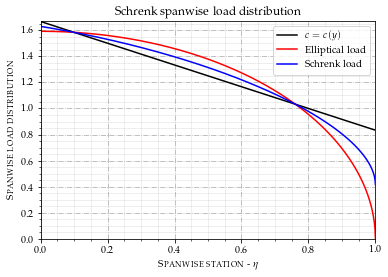

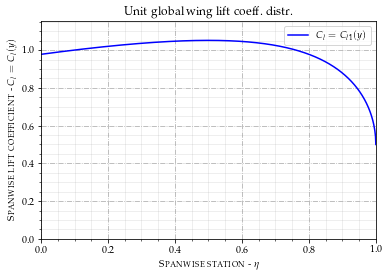

In [77]:

# -*- coding: utf-8 -*-
"""
Created on Sun Nov 14 09:47:06 2021

@author: claum
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import Schrenk_Load
%matplotlib inline
# ===================================================================
# CLOSE ALL FIGURE
# ===================================================================
plt.close('all')
# ===================================================================
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# ===================================================================
stat1  = PdfPages('figura1.pdf')
stat2  = PdfPages('figura2.pdf')
# stat3  = PdfPages('figura3.pdf')
# ===================================================================
# S       = 66.5
# b       = 19.0  
# c_tip   = 2.0 
# c_root  = 5.0 

S      = Schrenk_Data.S["Value"]
b      = Schrenk_Data.b["Value"]
c_tip  = Schrenk_Data.ctip["Value"]
c_root = Schrenk_Data.croot["Value"]

n       = 1000
my_load = Schrenk_Load.Schrenk_Load(b, S, c_root, c_tip, n) 
# ===================================================================
fig1  = plt.figure()
plt.plot(my_load[1], my_load[2], color="black", label='$c = c(y)$')
plt.plot(my_load[1], my_load[3], color="red", label='Elliptical load')
plt.plot(my_load[1], my_load[4], color="blue", label='Schrenk load')
plt.xlim((0.0, 1.0))
maxim1 = np.nanmax(my_load[2])
maxim2 = np.nanmax(my_load[4])
maxim3 = np.nanmax(my_load[4])
if maxim1 > maxim2 and maxim1 > maxim3: 
    plt.ylim((0.0, maxim1))
elif maxim2 > maxim1 and maxim2 > maxim3: 
    plt.ylim((0.0, maxim2))
elif maxim3 > maxim1 and maxim3 > maxim2: 
    plt.ylim((0.0, maxim3))    
plt.ylabel(r'\textsc{Spanwise load distribution}')              # y-label to the axes.
plt.xlabel(r'\textsc{Spanwise station} - $\eta$')      # x-label to the axes.
plt.title(r'Schrenk spanwise load distribution') 
plt.legend()
plt.grid(True, linestyle='-.', which='both')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()
stat1.savefig(fig1)
stat1.close()
# ===================================================================
# ===================================================================
fig2  = plt.figure()
# plt.plot(my_load[1], my_load[2], color="black", label='$c = c(y)$')
# plt.plot(my_load[1], my_load[3], color="red", label='Elliptical load')
plt.plot(my_load[1], my_load[5], color="blue", label='$C_l = C_{l1}(y)$')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, np.nanmax(my_load[5]) + 0.1))    
plt.ylabel(r'\textsc{Spanwise lift coefficient} - $C_l = C_{l}(y)$')              # y-label to the axes.
plt.xlabel(r'\textsc{Spanwise station} - $\eta$')      # x-label to the axes.
plt.title(r'Unit global wing lift coeff. distr.') 
plt.legend()
plt.grid(True, linestyle='-.', which='both')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()
stat2.savefig(fig2)
stat2.close()
# ===================================================================

In [78]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code